Prior to solving tasks I provide a small tutorial taken from ["link"](https://www.laurentluce.com/posts/binary-search-tree-library-in-python/). The goal is to learn a bit more on the tree concept in algorithms.

A binary search tree (BST) or ordered binary tree is a node-based binary tree data structure which has the following properties:

- The left subtree of a node contains only nodes with keys less than the node’s key.
- The right subtree of a node contains only nodes with keys greater than the node’s key.
- Both the left and right subtrees must also be binary search trees.

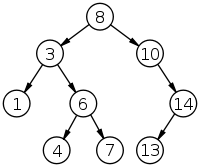

**Node class**

We need to represent a tree node. To do that, we create a new class named Node with 3 attributes:

- Left node
- Right node
- Node’s data (same as key in the definition above.)

In [ ]:
class Node:
    
    '''Tree node: left and right child + data which can be any object'''
    
    def __init__(self, data):
        
        '''
        Node contructor
        
        @param data node data object
        '''
            
        self.right = None
        self.left = None
        self.data = data    

In [ ]:
# We jsut created a node with value 8
root = Node(8)

**Insert method**

We need a method to help us populate our tree. This method takes the node’s data as an argument and inserts a new node in the tree.

In [ ]:
class Node():
    
    '''Tree node: left and right child + data which can be any object'''
    
    def __init__(self, data):
        
        '''
        Node contructor
        
        @param data node data object
        '''
        
        self.right = None
        self.left = None
        self.data = data
        
    def insert(self, data):
        """
        Insert new node with data. Call it recursively s we are locating the place where to add the new node.
        """
        
        if self.data:
            
            if data < self.data: # if value is less than the 'root' node value, add to left
                
                if self.left is None:
                    self.left = Node(data)
                else:
                    self.left.insert(data)
                        
            elif data > self.data:
                
                if self.right is None:
                    self.right = Node(data)
                else:
                    self.right.insert(data)
        
        else:
            self.data = data        

In [ ]:
root.insert(3)
root.insert(10)
root.insert(1)

**Lookup method**

We need a way to look for a specific node in the tree. We add a new method named lookup which takes a node’s data as an argument and returns the node if found or None if not. We also return the node’s parent for convenience.

In [ ]:
class Node():
    
    '''Tree node: left and right child + data which can be any object'''
    
    def __init__(self, data):
        
        '''
        Node contructor
        
        @param data node data object
        '''
        
        self.right = None
        self.left = None
        self.data = data
        
    def insert(self, data):
        """
        Insert new node with data. Call it recursively s we are locating the place where to add the new node.
        """
        
        if self.data:
            
            if data < self.data: # if value is less than the 'root' node value, add to left
                
                if self.left is None:
                    self.left = Node(data)
                else:
                    self.left.insert(data)
                        
            elif data > self.data:
                
                if self.right is None:
                    self.right = Node(data)
                else:
                    self.right.insert(data)
        
        else:
            self.data = data
            
        
    def lookup(self, data, parent=None):
        
        """
        Lookup node containing data 
        @param data node data object to look up
        @param parent node's parent
        @returns node and node's parent if found or None, None
        """
        # we call 
        if data < self.data:
            
            if self.left is None:
                return None,None
            
            return self.left.lookup(data,self)
        
        elif data > self.data:
            if self.right is None:
                return None,None
            return self.right.lookup(data, self)
        
        else:
            return self,parent

**Delete method**

The method delete() takes the data of the node to remove as an argument. There are 3 possibilities to handle:

1) The node to remove has no child.

2) The node to remove has 1 child.

3) The node to remove has 2 children


In order to to it we need to define one helper - function *children_count*

In [ ]:
class Node():
    
    '''Tree node: left and right child + data which can be any object'''
    
    def __init__(self, data):
        
        '''
        Node contructor
        
        @param data node data object
        '''
        
        self.right = None
        self.left = None
        self.data = data
        
    def insert(self, data):
        """
        Insert new node with data. Call it recursively s we are locating the place where to add the new node.
        """
        
        if self.data:
            
            if data < self.data: # if value is less than the 'root' node value, add to left
                
                if self.left is None:
                    self.left = Node(data)
                else:
                    self.left.insert(data)
                        
            elif data > self.data:
                
                if self.right is None:
                    self.right = Node(data)
                else:
                    self.right.insert(data)
        
        else:
            self.data = data
            
        
    def lookup(self, data, parent=None):
        
        """
        Lookup node containing data 
        @param data node data object to look up
        @param parent node's parent
        @returns node and node's parent if found or None, None
        """
        # we call 
        if data < self.data:
            
            if self.left is None:
                return None,None
            
            return self.left.lookup(data,self)
        
        elif data > self.data:
            if self.right is None:
                return None,None
            return self.right.lookup(data, self)
        
        else:
            return self,parent
        
    # Helper function    
    def children_count(self):
            
        """Return the number of children
        @returns number of children: 0, 1, 2
        """
        
        cnt = 0
        if self.left:
            cnt += 1
        if self. right:
            cnt += 1
            
        return cnt
    
    
    def delete(self.data):
        
        """
        Delete node containing data
       @param data node's content to delete
        """

        # get node containing data
        
        node, parent = self.lookup(data)
        
        if node is not None:
            children_count = node.children_count()
            
            # First case, no children. We look for the node to remove and we set 
            # its parent’s left or right child to None. If it is the root node 
            # (no parent), we clear its data.
            
            if children_count == 0:
                if parent:
                    if parent.left is node:
                        parent.left = None
                    else:
                        parent.right = None
                    del node
                else: self.data = None
                    
            
            # The second possibility which is the node to be removed has one child. 
            # We replace the node with its child. We also handle the special case 
            # when the node is the root of the tree.

            elif children_count == 1:
                
                # if node has 1 child
                # replace node with its child
                
                if node.left:
                    n = node.left
                else:
                    n = node.right
                    
                if parent:
                    if parent.left is node:
                        parent.left = n
                    else:
                        parent.right = n
                    del node
                else:
                    self.left = n.left
                    self.right = n.right
                    self.data = n.data       
                    
            # The last possibility which is the node to be removed has 2 children. 
            # We replace its data with its successor’s data and we fix the successor’s
            # parent’s child.
            
            else:
                # if node has 2 children
                # find its successor
                parent = node
                successor = node.right
                while successor.left:
                    parent = successor
                    successor = successor.left
                # replace node data by its successor data
                node.data = successor.data
                # fix successor's parent node child
                if parent.left == successor:
                    parent.left = successor.right
                else:
                    parent.right = successor.right

Introduction is done and below I provide solutions to hackerrank *tree* chapter.

## 1) BSTree: Height of a Binary Tree

The height of a binary tree is the number of edges between the tree's root and its furthest leaf.

In [ ]:
class Node:
    def __init__(self, info): 
        self.info = info  
        self.left = None  
        self.right = None 
        self.level = None 

    def __str__(self):
        return str(self.info) 

class BinarySearchTree:
    def __init__(self): 
        self.root = None

    def create(self, val):  
        if self.root == None:
            self.root = Node(val)
        else:
            current = self.root
         
            while True:
                if val < current.info:
                    if current.left:
                        current = current.left
                    else:
                        current.left = Node(val)
                        break
                elif val > current.info:
                    if current.right:
                        current = current.right
                    else:
                        current.right = Node(val)
                        break
                else:
                    break

# Enter your code here. Read input from STDIN. Print output to STDOUT
'''
class Node:
      def __init__(self,info): 
          self.info = info  
          self.left = None  
          self.right = None 
           

       // this is a node of the tree , which contains info as data, left , right
'''
def height(root):
    
    if not root:
        return -1
    
    else:
        
        return max(height(root.left), height(root.right)) + 1
        
tree = BinarySearchTree()
t = int(input())

arr = list(map(int, input().split()))

for i in range(t):
    tree.create(arr[i])

print(height(tree.root))


## 2) BSTree: Lowest Common Ancestor


In [ ]:
class Node:
    def __init__(self, info): 
        self.info = info  
        self.left = None  
        self.right = None 
        self.level = None 

    def __str__(self):
        return str(self.info) 

class BinarySearchTree:
    def __init__(self): 
        self.root = None

    def create(self, val):  
        if self.root == None:
            self.root = Node(val)
        else:
            current = self.root
         
            while True:
                if val < current.info:
                    if current.left:
                        current = current.left
                    else:
                        current.left = Node(val)
                        break
                elif val > current.info:
                    if current.right:
                        current = current.right
                    else:
                        current.right = Node(val)
                        break
                else:
                    break

# Enter your code here. Read input from STDIN. Print output to STDOUT
'''
class Node:
      def __init__(self,info): 
          self.info = info  
          self.left = None  
          self.right = None 
           

       // this is a node of the tree , which contains info as data, left , right
'''

# We traverse from the bottom, and once we reach a node which matches one of the two 
# nodes, we pass it up to its parent. The parent would then test its left and right 
# subtree if each contain one of the two nodes. If yes, then the parent must be the 
# LCA and we pass its parent up to the root. If not, we pass the lower node which 
# contains either one of the two nodes (if the left or right subtree contains either 
# v1 or v2), or NULL (if both the left and right subtree does not contain either v1 
# or v2) up.

def lca(root, v1, v2):
    
    if not root: 
        return None
    
    if root.info == v1 or root.info == v2: 
        return root
    
    left = lca(root.left, v1, v2)
    right = lca(root.right, v1, v2)
    
    if left and right: 
        # v1 & v2 are on both sides
        return root
    else: 
        # EITHER v1/v2 is on one side 
        # OR v1/v2 is not in L&R subtrees
        return left if left else right

tree = BinarySearchTree()
t = int(input())

arr = list(map(int, input().split()))

for i in range(t):
    tree.create(arr[i])

v = list(map(int, input().split()))

ans = lca(tree.root, v[0], v[1])
print (ans.info)
